In [1]:
# Import necessary libraries
from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

README.md:   0%|          | 0.00/125 [00:00<?, ?B/s]

C:\Users\rasho\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rasho\.cache\huggingface\hub\datasets--codesignal--tsla-historic-prices. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tsla.csv:   0%|          | 0.00/235k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3347 [00:00<?, ? examples/s]

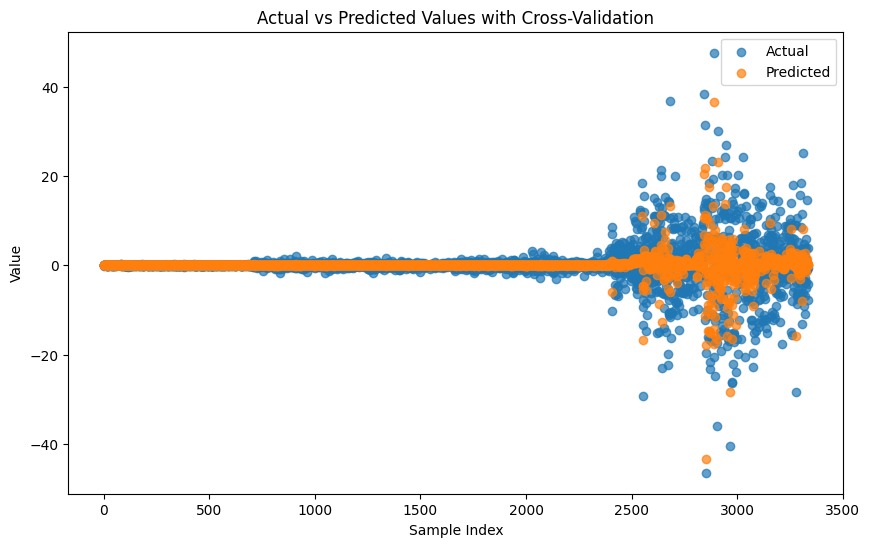

In [2]:
# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Feature Engineering
tesla_df['Target'] = tesla_df['Adj Close'].shift(-1) - tesla_df['Adj Close']
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Drop NaN values created by moving averages
tesla_df.dropna(inplace=True)

# Select features and target
features = tesla_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10']].values
target = tesla_df['Target'].values

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Instantiate model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# TODO: Perform cross-validation with 5 folds and print the mean score

# Fit model to visualize predictions
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target)), target, label='Actual', alpha=0.7)
plt.scatter(range(len(target)), predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values with Cross-Validation')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

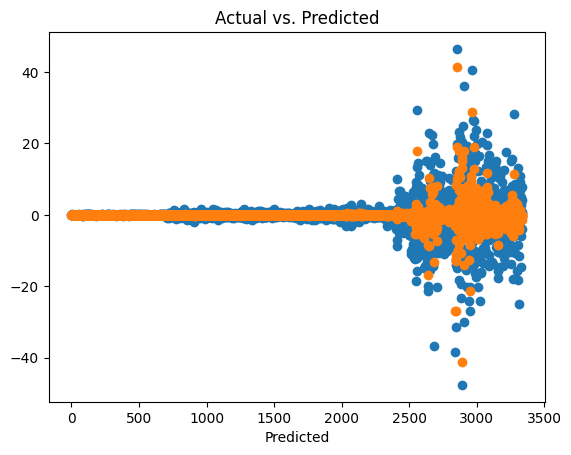

In [3]:
# heres another example of the gradient boosting regressor model in use:

from datasets import load_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load dataset
tesla = load_dataset('codesignal/tsla-historic-prices')
tesla_df = pd.DataFrame(tesla['train'])

# TODO: Convert Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date']
)
# TODO: Perform feature engineering to add a shifted Adj Close column as target, and the mean and std of Adj Close over 5 and 10 days
# - Add a new column 'Target' which is the difference between the shifted 'Adj Close' and the current 'Adj Close' to use as the target variable.
# - Add columns 'Mean_5' and 'Std_5', which are the mean and standard deviation of the 'Adj Close' over the past 5 days.
# - Add columns 'Mean_10' and 'Std_10', which are the mean and standard deviation of the 'Adj Close' over the past 10 days.

tesla_df['Target'] = tesla_df['Adj Close'].shift(1) - tesla_df['Adj Close'] 
tesla_df['Mean_5'] = tesla_df['Adj Close'].rolling(window=5).mean() 
tesla_df['Mean_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['Std_5'] = tesla_df['Adj Close'].rolling(window=5).std() 
tesla_df['Std_10'] = tesla_df['Adj Close'].rolling(window=10).std() 

# TODO: Drop NaN values created during feature engineering
tesla_df.dropna(inplace=True)

# TODO: Select features and target values for model
# The target is the 'Target' column, features to choose is up to you
target = tesla_df['Target']

features = tesla_df[['Mean_5','Mean_10','Std_5','Std_10']]

# TODO: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# TODO: Instantiate the Gradient Boosting model with `n_estimators = 100`, `learning_rate = 0.1`, `max_depth = 3`
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# TODO: Perform 5-fold cross-validation and print the mean cross-validation score
scores = cross_val_score(model, features_scaled, target, cv=5)

# TODO: Fit the model to the entire dataset and predict target values
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

# TODO: Plot actual vs predicted values to visualize model performance```
plt.scatter(x=range(len(target)), y=target)
plt.scatter(x=range(len(target)), y=predictions)
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()